In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("Preprocess_Placement.csv")
dataset

,Unnamed: 0,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,0,1.0,67.00,91.00,58.00,55.0,58.80,270000.000000,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,1,2.0,79.33,78.33,77.48,86.5,66.28,200000.000000,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,2,3.0,65.00,68.00,64.00,75.0,57.80,250000.000000,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,3,4.0,56.00,52.00,52.00,66.0,59.43,288655.405405,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,4,5.0,85.80,73.60,73.30,96.8,55.50,425000.000000,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,210,211.0,80.60,82.00,77.60,91.0,74.49,400000.000000,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,211,212.0,58.00,60.00,72.00,74.0,53.62,275000.000000,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,212,213.0,67.00,67.00,73.00,59.0,69.72,295000.000000,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,213,214.0,74.00,66.00,58.00,70.0,60.23,204000.000000,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [3]:
dataset.isnull().sum()

Unnamed: 0        0
sl_no             0
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

In [4]:
import seaborn as sns
from matplotlib import pyplot
from scipy.stats import norm

In [5]:
def PrDF(dataset,startpoint,endpoint):
    ax=sns.distplot(dataset,kde=True, kde_kws={'color':'Blue'},color='Green')
    pyplot.axvline(startpoint, color='red')
    pyplot.axvline(endpoint, color='red')

    sample=dataset
    sample_mean=sample.mean()
    sample_std=sample.std()
    print ("Mean:", sample_mean, "Standard_deviation", sample_std)

    dist=norm(sample_mean, sample_std)

    values=[value for value in range(startpoint,endpoint)]
    probabilities = [dist.pdf(value) for value in values]
    prob=sum(probabilities)
    print("The area between range({}, {}):{}".format(startpoint, endpoint, sum(probabilities)))
    return prob
#sns.distplot(dataset["ssc_p"])

C:\Users\keert\AppData\Local\Temp\ipykernel_21524\623857284.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(dataset,kde=True, kde_kws={'color':'Blue'},color='Green')


Mean: 67.30339534883721 Standard_deviation 10.827205398231452
The area between range(30, 50):0.04975565054254948


0.04975565054254948

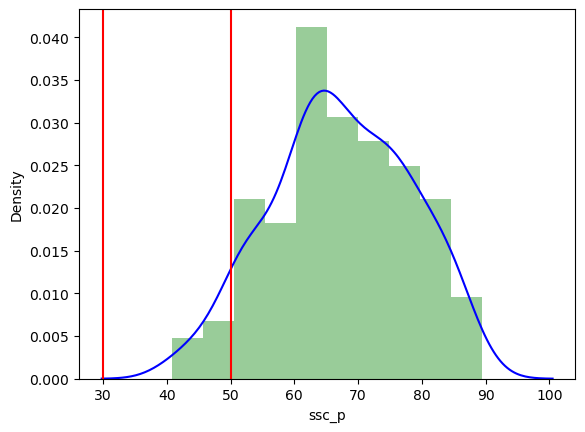

In [6]:
PrDF(dataset["ssc_p"],30,50)

In [7]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(dataset["ssc_p"])
ecdf (78)

0.827906976744186

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([66.98761195, 67.08761195, 67.18761195, 67.28761195, 67.38761195,
        67.48761195, 67.58761195, 67.68761195, 67.78761195, 67.88761195,
        67.98761195]),
 <BarContainer object of 10 artists>)

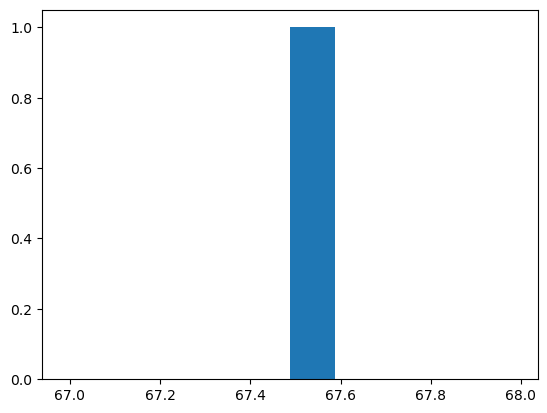

In [15]:
import numpy as np
sample=dataset["ssc_p"]
mean=sample.mean()
std_dev=sample.std()
data = np.random.normal(mean, std_dev)
pyplot.hist(data)